## Assignment 7
### Meenu Ravi
### May 26 2021

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sktime.forecasting.all import temporal_train_test_split
from statsmodels.tsa.stattools import kpss, adfuller
import warnings
import sktime
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import math
from sktime.performance_metrics.forecasting import smape_loss
from sktime.performance_metrics.forecasting import mape_loss
warnings.filterwarnings('ignore')
from sktime.datasets import load_basic_motions
# pd.set_option("display.max_rows", None, "display.max_columns", None)


#### Load the acsf1 dataset using sktime built in functions.

In [2]:
X, y=sktime.datasets.base.load_acsf1(return_X_y=True)

In [3]:
X

,dim_0
0,0 -0.584754 1 -0.584754 2 1.73...
1,0 -0.591434 1 -0.511104 2 1.72...
2,0 -0.577945 1 -0.577945 2 1.73...
3,0 -0.588925 1 -0.538088 2 1.73...
4,0 -0.596633 1 -0.532188 2 1.71...
...,...
95,0 -0.865824 1 0.116534 2 1.66...
96,0 -0.631937 1 -0.631937 2 1.61...
97,0 -0.997077 1 0.108756 2 1.58...
98,0 -0.891590 1 -0.752940 2 1.42...


In [4]:
y

0     9
1     9
2     9
3     9
4     9
     ..
95    1
96    1
97    1
98    1
99    1
Length: 200, dtype: object

#### Create X_train, y_train and X_test, y_test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, [0]],y, random_state=21)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


### Part 1: 35 pts Understanding the dataset

#### A. 7pts Give a verbal description of the dataset from information on the acsf1 detailed webpage, not the summary repository page.

#### B. 7pts There are 1460 time steps in each observation. Use len() to display this for any observation in the X_train

In [7]:
first_five_indices=X_train.index.to_list()[:5]
for i in first_five_indices:
    print(len(X_train.dim_0.iloc[i]))

1460
1460
1460
1460
1460


#### C. 7pts Return the counts of classes in y_train

In [8]:
len(y_train)

150

In [9]:
val_counts=y_train.value_counts()
val_counts

8    18
5    17
7    17
2    17
0    16
4    14
1    13
3    13
6    13
9    12
dtype: int64

In [10]:
class_list=val_counts.index.to_list()
class_list
for i in range(0,len(class_list)):
    class_list[i]=int(class_list[i])
# class_list=sorted(class_list)
class_list

[8, 5, 7, 2, 0, 4, 1, 3, 6, 9]

#### D. 7pts Plot the first time series for each class(.iloc[0]), label each plot with its specified class name. The patterns should match what can be found on the acsf1 detailed webpage.

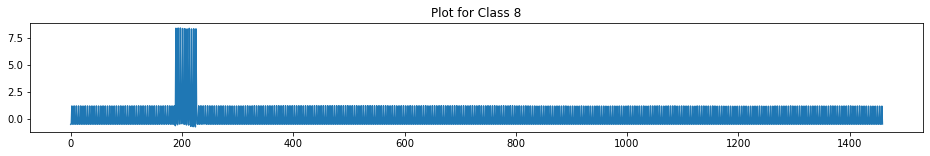

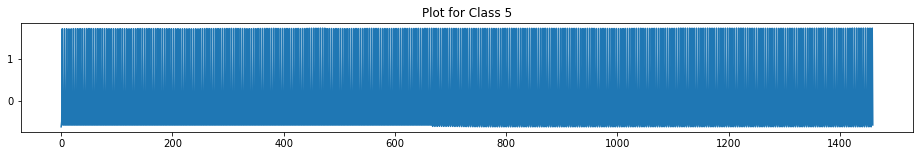

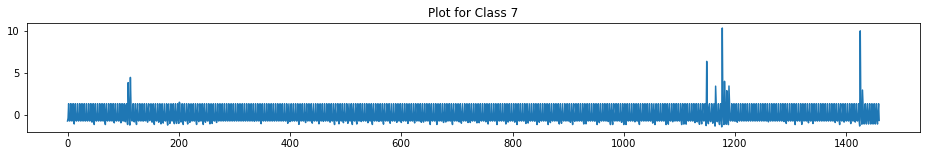

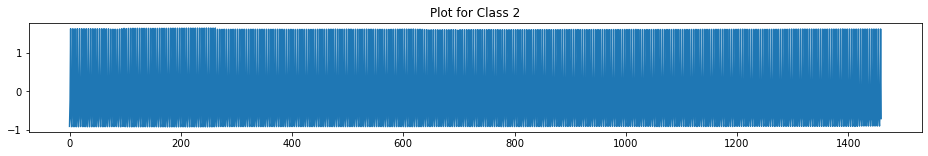

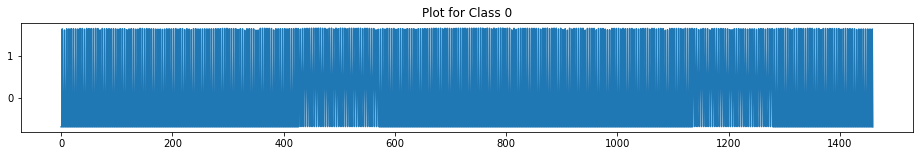

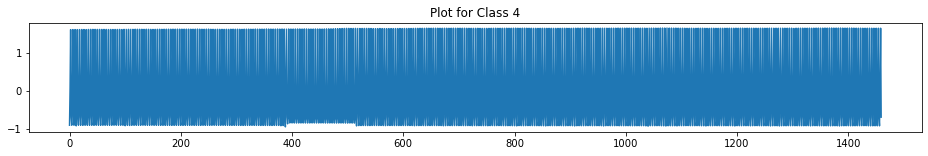

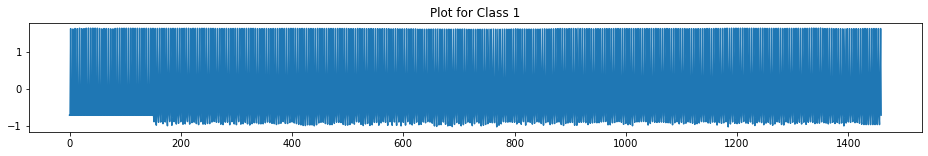

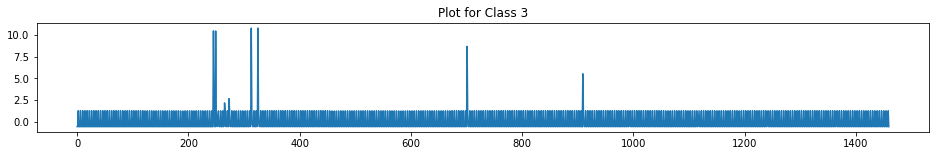

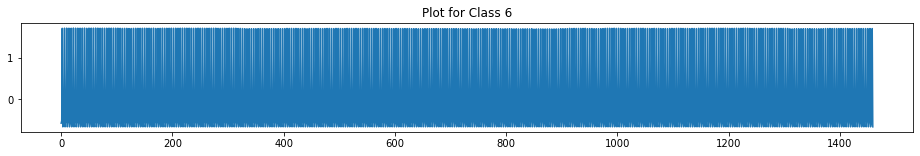

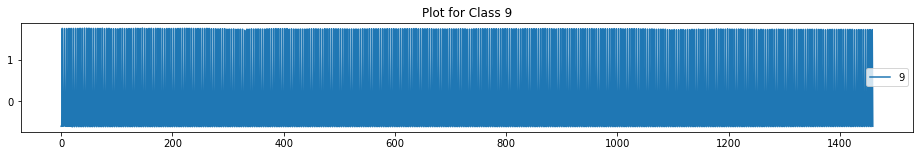

In [11]:

for label in class_list:
    fig, ax = plt.subplots(1, figsize=plt.figaspect(0.1))
#     ax.set_ylim([-2,2])
    X_train.loc[y_train == str(label), "dim_0"].iloc[0].plot(ax=ax, label=label,title="Plot for Class "+str(label))
plt.legend()


#### 7pts Each observation is 10 seconds apart. Describe what the plots show for classes 3, 8 and 9. Give some intuition about what appliance each of these three classes might represent.

### Part 2: 15 pts Description of Time Series Classification models

#### A. 5 pts Select one classification model type. Describe how the model works. Why would each be a good or bad fit for this type of data?


knn

#### B. 5 pts Select a second classification model type. Describe how the model works. Why would each be a good or bad fit for this type of data?


random forest

#### C. 5 pts Select third classification model type. Describe how the model works. Why would each be a good or bad fit for this type of data?

xgboost

### Part 3: 50 pts Select one method. Model and examine results

#### A. 10 pts Select only one method. Fit your model. Feel free to adjust parameters or try a grid search (optional)

In [12]:
from sklearn.model_selection import GridSearchCV
params={
    'n_neighbors':[2,3,5,7],
    'weights':['uniform','distance']
}

In [14]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

grid=GridSearchCV(
    KNeighborsTimeSeriesClassifier(),
    params,
    verbose=True,
    cv=3,
    n_jobs=12,
    scoring='accuracy'
)


In [17]:
# from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

# knn = KNeighborsTimeSeriesClassifier(n_neighbors=1, metric="dtw")
grid_fit=grid.fit(X_train, y_train)
# knn.score(X_test, y_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [18]:
print(grid_fit.best_score_)
print(grid_fit.best_estimator_)
print(grid_fit.best_params_)


0.58
KNeighborsTimeSeriesClassifier(n_neighbors=7, weights='distance')
{'n_neighbors': 7, 'weights': 'distance'}
